In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)

In [70]:
# Sample Data
from sklearn.datasets import make_moons

data, label = make_moons(n_samples=300, shuffle=True, noise=0.5, random_state=2022)

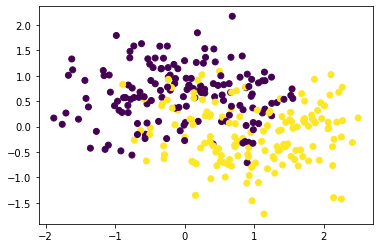

In [71]:
plt.scatter(data[:, 0], data[:, 1], c=label)

In [72]:
# Resample Data
from imblearn.datasets import make_imbalance
from collections import Counter

def ratio_func(y, multiplier, minority_class):
    target_stats = Counter(y)
    return {minority_class: int(multiplier * target_stats[minority_class])}

data, label = make_imbalance(
    data,
    label,
    sampling_strategy=ratio_func,
    **{"multiplier": 0.1, "minority_class": 1,}
)

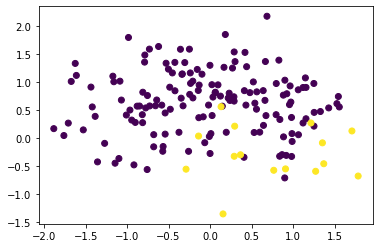

In [73]:
plt.scatter(data[:, 0], data[:, 1], c=label)

In [74]:
# Data Split
# Train Data에는 정상 데이터만 있어야 됨
normal_data, abnormal_data = data[label==0], data[label==1]
normal_label, abnormal_label = label[label==0], label[label==1]

In [75]:
# 정상 데이터
normal_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [76]:
# 비정상 데이터
abnormal_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [77]:
from sklearn.model_selection import train_test_split

train_data, test_normal_data, train_label, test_normal_label = train_test_split(
    normal_data, normal_label, train_size=0.7, random_state=2022
)

In [78]:
test_data = np.concatenate([test_normal_data, abnormal_data])
test_label = np.concatenate([test_normal_label, abnormal_label])

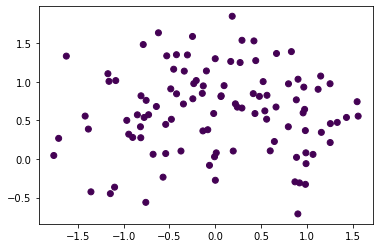

In [79]:
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_label)

In [80]:
test_label.mean()

0.25

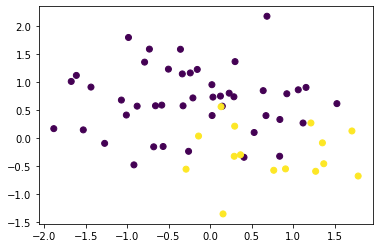

In [81]:
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_label)

In [82]:
# 시각화 데이터
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [83]:
# Isolation Forest
from sklearn.ensemble import IsolationForest

isol_forest = IsolationForest()

In [84]:
# 학습
isol_forest.fit(train_data, train_label)

IsolationForest()

In [85]:
# 예측
isol_test_pred = isol_forest.predict(test_data)

In [86]:
# 1은 정상 -1은 비정상
isol_test_pred

array([ 1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
       -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1,  1, -1])

In [87]:
isol_forest.decision_function(test_data)

array([ 0.06979271, -0.06390139,  0.02306522, -0.02341326,  0.01239403,
        0.05534101,  0.0723338 , -0.0287271 , -0.10328856, -0.06212977,
       -0.12838668,  0.0626645 ,  0.04671482,  0.06207056, -0.04769661,
        0.01104545,  0.01340099,  0.06113148,  0.04768897,  0.06193662,
       -0.00346706,  0.05041917, -0.07007338,  0.07548922,  0.06732844,
       -0.13956896, -0.06805361,  0.06325282,  0.06927578, -0.03435003,
       -0.12306696, -0.02686385,  0.01207922,  0.04677351, -0.05125212,
        0.06514812,  0.03747591,  0.03870537, -0.02445088, -0.0963646 ,
        0.05503973,  0.0698481 , -0.08372856,  0.02610727,  0.03987569,
        0.03478245, -0.00504148, -0.10981561, -0.08680389, -0.1990753 ,
       -0.14582248, -0.14081898, -0.04679892,  0.03345408, -0.09944899,
       -0.14141995, -0.04875395, -0.10100641,  0.07033059, -0.07513063])

In [88]:
# 평가
# 정확도
from sklearn.metrics import accuracy_score

isol_test_acc = accuracy_score(test_label, isol_test_pred == -1)

In [89]:
print(f"Isolation Forest Test Accuracy is {isol_test_acc:.4f}")   

Isolation Forest Test Accuracy is 0.6500


In [90]:
# F1 Score
from sklearn.metrics import f1_score

isol_test_f1 = f1_score(test_label, isol_test_pred == -1)

In [91]:
print(f"Isolation Forest Test F1-Score is {isol_test_f1:.4f}")   

Isolation Forest Test F1-Score is 0.5333


In [92]:
# 시각화
isol_Z = isol_forest.predict(np.c_[xx.ravel(), yy.ravel()])
isol_Z = isol_Z.reshape(xx.shape)

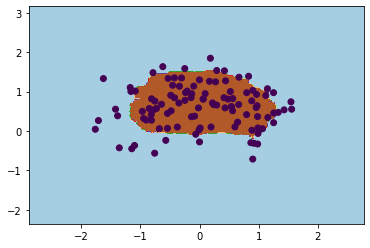

In [93]:
cs = plt.contourf(xx, yy, isol_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label)

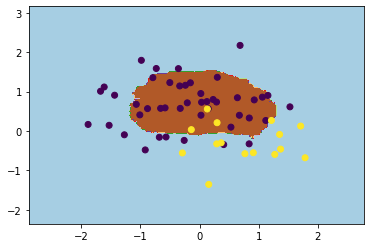

In [94]:
# Boundary 안의 노랑점은 정상으로 예측, 바깥은 비정상으로 예측
cs = plt.contourf(xx, yy, isol_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label)

In [95]:
# OCSVM
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM()

In [96]:
# 학습
ocsvm.fit(train_data, train_label)

OneClassSVM()

In [97]:
# 예측
ocsvm_test_pred = ocsvm.predict(test_data)

In [98]:
ocsvm_test_pred

array([ 1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,
        1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1,  1, -1], dtype=int64)

In [99]:
# 평가
# 정확도
ocsvm_test_acc = accuracy_score(test_label, ocsvm_test_pred == -1)

In [100]:
print(f"OCSVM Test Accuracy is {ocsvm_test_acc:.4f}")   

OCSVM Test Accuracy is 0.5833


In [101]:
# F1 Score
ocsvm_test_f1 = f1_score(test_label, ocsvm_test_pred == -1)

In [102]:
print(f"OCSVM Test F1-Score is {ocsvm_test_f1:.4f}")   

OCSVM Test F1-Score is 0.5098


In [103]:
# 시각화
ocsvm_Z = ocsvm.predict(np.c_[xx.ravel(), yy.ravel()])
ocsvm_Z = ocsvm_Z.reshape(xx.shape)

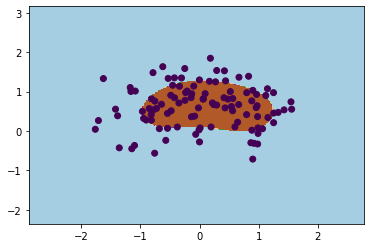

In [104]:
cs = plt.contourf(xx, yy, ocsvm_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label)

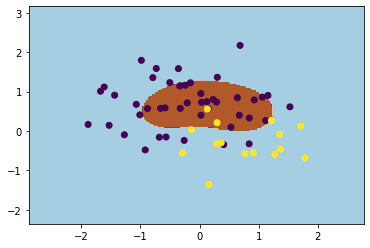

In [105]:
cs = plt.contourf(xx, yy, ocsvm_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label)

In [106]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

In [107]:
# 학습
pca.fit(train_data)

PCA(n_components=1)

In [108]:
# 예측
test_latent = pca.transform(test_data)

In [109]:
test_latent[:10]

array([[ 0.00977475],
       [ 1.30865666],
       [ 1.04414641],
       [-0.79942153],
       [-1.03036075],
       [-0.60785977],
       [-0.11366886],
       [ 0.38525386],
       [ 1.6426274 ],
       [ 1.46766727]])

In [110]:
test_recon = pca.inverse_transform(test_latent)

In [111]:
recon_diff = (test_data - test_recon) ** 2

In [112]:
test_data[0]

array([0.022291  , 0.95240415])

In [113]:
test_recon[0]

array([0.0242172 , 0.61911557])

In [114]:
recon_diff[0]

array([3.71023184e-06, 1.11081278e-01])

In [115]:
pca_pred = recon_diff.mean(1)

In [116]:
pca_pred[:10]

array([0.05554249, 0.24972178, 0.02053095, 0.45006028, 0.02784321,
       0.0249976 , 0.0013042 , 0.46829956, 0.12921728, 0.04469327])

In [117]:
# 평가
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(test_label, pca_pred)
pca_auroc = auc(fpr, tpr)

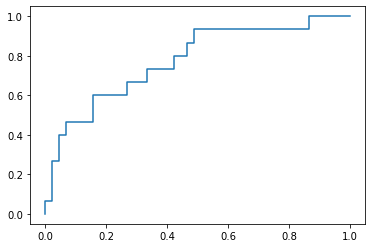

In [118]:
plt.plot(fpr, tpr)

In [119]:
print(f"PCA test AUROC is {pca_auroc:.4f}")   

PCA test AUROC is 0.7748


In [120]:
# Best Threshold
f1_scores = []
for t in threshold:
    pca_test_pred = pca_pred > t
    pca_test_f1 = f1_score(test_label, pca_test_pred)
    f1_scores += [pca_test_f1]
    print(f"threshold: {t:.4f}, f1-score: {pca_test_f1:.4f}")

threshold: 2.9497, f1-score: 0.0000
threshold: 1.9497, f1-score: 0.0000
threshold: 1.2035, f1-score: 0.1250
threshold: 0.7189, f1-score: 0.3158
threshold: 0.6988, f1-score: 0.4000
threshold: 0.6883, f1-score: 0.4545
threshold: 0.5972, f1-score: 0.5217
threshold: 0.5895, f1-score: 0.5000
threshold: 0.4501, f1-score: 0.5000
threshold: 0.4234, f1-score: 0.5333
threshold: 0.2744, f1-score: 0.5143
threshold: 0.2540, f1-score: 0.5000
threshold: 0.1840, f1-score: 0.5128
threshold: 0.1697, f1-score: 0.5000
threshold: 0.1292, f1-score: 0.5000
threshold: 0.1263, f1-score: 0.4889
threshold: 0.0969, f1-score: 0.5106
threshold: 0.0836, f1-score: 0.5000
threshold: 0.0805, f1-score: 0.5306
threshold: 0.0638, f1-score: 0.5200
threshold: 0.0021, f1-score: 0.4179
threshold: 0.0018, f1-score: 0.4118
threshold: 0.0001, f1-score: 0.4054


In [121]:
best_thresh = threshold[np.argmax(f1_scores)]
best_thresh

0.4233668505868821

In [122]:
pca_test_pred = pca_pred > best_thresh

In [123]:
pca_test_pred

array([False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True, False, False])

In [124]:
# 정확도
pca_test_acc = accuracy_score(test_label, pca_test_pred)

In [125]:
print(f"PCA Test Accuracy is {pca_test_acc:.4f}")   

PCA Test Accuracy is 0.7667


In [126]:
# F1 Score
pca_test_f1 = f1_score(test_label, pca_test_pred)

In [127]:
print(f"PCA Test F1-Score is {pca_test_f1:.4f}")

PCA Test F1-Score is 0.5333


In [128]:
# 시각화
Z = np.c_[xx.ravel(), yy.ravel()]
Z_latent = pca.transform(Z)
Z_recon = pca.inverse_transform(Z_latent)
pca_Z = (Z - Z_recon).mean(1)

In [129]:
pca_Z = list(map(int, pca_Z > best_thresh))

In [130]:
pca_Z = np.array(pca_Z).reshape(xx.shape)

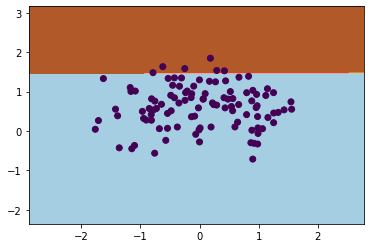

In [131]:
cs = plt.contourf(xx, yy, pca_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label)

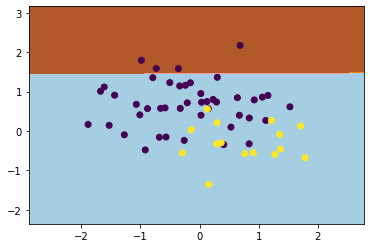

In [132]:
cs = plt.contourf(xx, yy, pca_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label)

In [133]:
# 비교
# 정확도
print(f"Isolation Forest Test Accuracy is {isol_test_acc:.4f}")
print(f"OCSVM Test Accuracy is {ocsvm_test_acc:.4f}")
print(f"PCA Test Accuracy is {pca_test_acc:.4f}")

Isolation Forest Test Accuracy is 0.6500
OCSVM Test Accuracy is 0.5833
PCA Test Accuracy is 0.7667


In [134]:
# F1-Score
print(f"Isolation Forest Test F1-Score is {isol_test_f1:.4f}")
print(f"OCSVM Test F1-Score is {ocsvm_test_f1:.4f}")
print(f"PCA Test F1-Score is {pca_test_f1:.4f}")

Isolation Forest Test F1-Score is 0.5333
OCSVM Test F1-Score is 0.5098
PCA Test F1-Score is 0.5333
